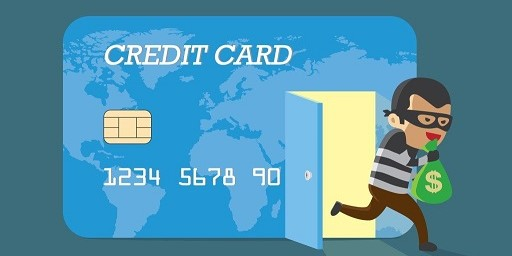

# Credit Card Fraud Detection

<p style='text-align: justify;'>In this project, the focus is on developing robust machine learning models to enhance the ability of credit card companies in recognizing fraudulent transactions, preventing unwarranted charges for customers. The dataset contains transformed data to maintain confidentiality, with untouched Time and Amount columns. The 'Class' feature, representing fraud (1) or legit (0), serves as the dependent variable. Our objective is to construct advanced models that effectively identify fraudulent activities, ensuring a secure financial environment for credit card holders.</p>

## Reading the dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Importing data file
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Splitting the data into 'Legit' and 'Fraudulent' transactions

In [6]:
# Distribution of legit and fraudulent transactions
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This is a highly unbalanced dataset as more than 99% of the data has legit transactions and we can not feed this data to the machine learning model. Hence, we will make some necessary changes in the data.

**0 = Legit Transaction  ,    1 = Fraudulent Transaction**

In [7]:
# Seperating data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
# Statistical measures of data

legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
# Compare the values for both transactions

data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Undersampling

Reducing the number of legit transactions to fraudulent transactions to build a robust machine learning model i.e. 492 transactions.

In [48]:
legit_sample = legit.sample(n=492)
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32508,36831.0,-0.409064,-0.357429,1.996208,-0.986927,-0.231251,1.792335,-1.045989,0.807461,-1.267367,...,0.669782,1.949540,-0.044076,-0.988546,-0.751330,0.136308,0.242389,0.128163,11.00,0
263764,161106.0,2.182664,-0.816907,-1.182612,-0.506839,-0.560771,-0.470415,-0.621406,-0.101797,-0.098331,...,-0.429267,-0.711759,0.299587,0.436893,-0.297904,0.544021,-0.056122,-0.053982,10.00,0
150439,93353.0,-0.834929,0.195096,2.034287,-2.298311,-0.322921,0.019517,0.068651,-0.059660,-0.023583,...,0.298572,1.000051,-0.501885,-0.329591,0.704233,-0.079623,-0.114027,0.026307,51.75,0
26708,34215.0,1.216135,-0.165286,-0.080163,-0.855132,-0.346520,-0.736451,0.065392,-0.046705,0.968275,...,0.068298,0.440049,-0.146121,0.252030,0.815678,-0.548571,0.046713,-0.001224,1.00,0
45557,42400.0,1.078540,-0.562184,1.199141,1.297798,-0.865169,1.374870,-1.262026,0.740642,1.564910,...,-0.016064,0.142534,-0.118760,-0.870898,0.382507,-0.194808,0.083445,0.011525,13.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231524,146796.0,-3.316907,-3.998503,1.054058,-0.749884,1.240904,-1.371696,-2.249025,0.934289,-0.095539,...,0.409756,-0.328690,0.146734,0.591326,-0.266014,-0.421890,0.048901,-0.471297,99.30,0
106572,70019.0,1.356407,-1.324575,0.730767,-1.255086,-1.929883,-0.779525,-1.169145,-0.148030,-1.573841,...,-0.018549,0.184330,-0.063353,0.382970,0.307474,-0.110602,0.036621,0.039726,86.00,0
71575,54347.0,0.550432,-0.849224,-0.028740,1.600370,-0.750556,-0.665107,0.531738,-0.107686,0.342753,...,0.197309,-0.048136,-0.309648,0.585279,0.518100,-0.306794,-0.044933,0.066408,319.90,0
17191,28512.0,-0.578161,1.604349,0.051961,0.594239,0.622138,-0.250479,0.449709,0.454511,-1.380644,...,0.066861,0.167025,-0.186489,-0.395052,-0.267067,0.472771,0.008871,0.092436,0.76,0


In [49]:
# Creating a new dataset by merging sample legit data and fraudulent data

new_data = pd.concat([legit_sample, fraud], axis=0)
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32508,36831.0,-0.409064,-0.357429,1.996208,-0.986927,-0.231251,1.792335,-1.045989,0.807461,-1.267367,...,0.669782,1.949540,-0.044076,-0.988546,-0.751330,0.136308,0.242389,0.128163,11.00,0
263764,161106.0,2.182664,-0.816907,-1.182612,-0.506839,-0.560771,-0.470415,-0.621406,-0.101797,-0.098331,...,-0.429267,-0.711759,0.299587,0.436893,-0.297904,0.544021,-0.056122,-0.053982,10.00,0
150439,93353.0,-0.834929,0.195096,2.034287,-2.298311,-0.322921,0.019517,0.068651,-0.059660,-0.023583,...,0.298572,1.000051,-0.501885,-0.329591,0.704233,-0.079623,-0.114027,0.026307,51.75,0
26708,34215.0,1.216135,-0.165286,-0.080163,-0.855132,-0.346520,-0.736451,0.065392,-0.046705,0.968275,...,0.068298,0.440049,-0.146121,0.252030,0.815678,-0.548571,0.046713,-0.001224,1.00,0
45557,42400.0,1.078540,-0.562184,1.199141,1.297798,-0.865169,1.374870,-1.262026,0.740642,1.564910,...,-0.016064,0.142534,-0.118760,-0.870898,0.382507,-0.194808,0.083445,0.011525,13.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [50]:
# Uniformly distributed the data
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [51]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94211.491870,-0.000266,-0.024784,-0.056095,-0.104974,0.018322,0.046068,-0.018958,-0.044744,0.041445,...,0.016010,-0.057506,-0.063466,-0.029693,0.026263,-0.005472,-0.005357,0.037518,-0.007669,86.658435
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


After grouping the new data on the basis of 'Class' we are getting a mean of USD 86.658 for legit transactions and in the original dataset it was USD 88.291. Hence, we can conclude that features of the data has not changed much.

## Splitting the data into depndent and independent variables

In [52]:
x = new_data.drop('Class', axis=1)
y = new_data['Class']

In [53]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
32508    36831.0 -0.409064 -0.357429  1.996208 -0.986927 -0.231251  1.792335   
263764  161106.0  2.182664 -0.816907 -1.182612 -0.506839 -0.560771 -0.470415   
150439   93353.0 -0.834929  0.195096  2.034287 -2.298311 -0.322921  0.019517   
26708    34215.0  1.216135 -0.165286 -0.080163 -0.855132 -0.346520 -0.736451   
45557    42400.0  1.078540 -0.562184  1.199141  1.297798 -0.865169  1.374870   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [54]:
print(y)

32508     0
263764    0
150439    0
26708     0
45557     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [55]:
# Split the data onto train and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.2, stratify= y, random_state= 2)

In [56]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (196, 30) (788, 30)


## Model training and evaluation

### Logistic Regression

In [57]:
LR = LogisticRegression()

In [58]:
# Training the logistic regression model with training data
LR.fit(x_train, y_train)

LogisticRegression()

In [59]:
# Accuracy on training data

x_train_prediction = LR.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [60]:
print("Accuracy score on training data using Logistic Regression :",training_data_accuracy )

Accuracy score on training data using Logistic Regression : 0.9285714285714286


In [61]:
# Accuracy on test data

x_test_prediction = LR.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [62]:
print("Accuracy score on test data using Logistic Regression :",test_data_accuracy )

Accuracy score on test data using Logistic Regression : 0.9137055837563451


### Random Forrest Classifier

In [63]:
RFC = RandomForestClassifier()

In [64]:
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
x_train_prediction = RFC.predict(x_train)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [66]:
print("Accuracy score on train data using Random Forrest Classifier :",train_data_accuracy )

Accuracy score on train data using Random Forrest Classifier : 1.0


In [67]:
x_test_prediction = RFC.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [68]:
print("Accuracy score on test data using Random Forrest Classifier :",test_data_accuracy )

Accuracy score on test data using Random Forrest Classifier : 0.9276649746192893


### Decision Tree Classifier

In [38]:
DTC = DecisionTreeClassifier()

In [39]:
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [69]:
x_train_prediction = DTC.predict(x_train)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [70]:
print("Accuracy score on train data using Decision Tree Classifier :",train_data_accuracy )

Accuracy score on train data using Decision Tree Classifier : 0.9540816326530612


In [71]:
x_test_prediction = DTC.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [72]:
print("Accuracy score on test data using Random Forrest Classifier :",test_data_accuracy )

Accuracy score on test data using Random Forrest Classifier : 0.8946700507614214


**From the above model testing we can evaluate that 'Random Forest Classifier' model is the most accurate with accuracy of 92.76 %. So, we will use this model to predict future credit card fraud detections.**

# Conclusion

<p style='text-align: justify;'>In this project, we classified transactions into legitimate and fraudulent categories, employing undersampling to balance the dataset and construct a resilient machine learning model. Logistic Regression, Random Forest Classifier, and Decision Tree Classifier models were implemented and evaluated. Among them, the 'Random Forest Classifier' emerged as the most accurate, boasting an impressive 92.76% accuracy. Consequently, we have chosen this model as our primary tool for predicting and detecting future instances of credit card fraud, offering a robust solution for enhancing security and protecting users from unauthorized transactions.</p>